In [1]:
from ete3 import Tree, TreeStyle, PieChartFace,NodeStyle
import seaborn as sns
import os
import numpy as np
from Bio import SeqIO
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook

In [2]:
### this can be any tree as long as leaves are labeled with the name of the strain used by PyParanoid
tree = Tree("exp_strains.rerooted.tre")
strains = tree.get_leaf_names()

In [3]:
### specify the path to the 'homolog_matrix' file in your PyParanoid output directory
matrixfile = open("../data/Pseudo/homolog_matrix.txt",'r')
header = matrixfile.readline().rstrip().split("\t")
indices = [header.index(s) for s in strains]

In [4]:
lines = []
for line in matrixfile:
    vals = line.rstrip().split("\t")
    lines.append([int(bool(int(vals[i]))) for i in indices])
a = np.stack(lines)

In [5]:
genome_sizes = {}
for s in strains:
    count = 0
    ### path to your genomedb folder
    for seq in SeqIO.parse(open("../data/genomedb/pep/{}.pep.fa".format(s),'r'),'fasta'):
        count += 1
    genome_sizes[s] = count

In [6]:
def add_piecharts(node,nstyle,strains,a,genome_sizes,pal):
	node_strains = node.get_leaf_names()
	node.set_style(nstyle)
	if len(node_strains) > 1:
		col_indices = [strains.index(ns) for ns in node_strains]
		orth_count = 0
		for i in range(a.shape[0]):
			if np.count_nonzero(a[i,col_indices]) == len(col_indices):
				orth_count += 1
		frac = float(orth_count)/float(sum([genome_sizes[ns] for ns in node_strains])/len(node_strains))

		size = 15
		f = PieChartFace([frac*100,100-(frac*100)],size,size,colors=[colors.rgb2hex(c) for c in [pal[0],pal[7]]])
		node.add_face(f,0)
	return

In [7]:
pal = sns.color_palette("Set2",10)
nstyle = NodeStyle()
nstyle["size"] = 0
ts = TreeStyle()
for node in tree.iter_descendants("preorder"):
    add_piecharts(node,nstyle,strains,a,genome_sizes,pal)
add_piecharts(tree,nstyle,strains,a,genome_sizes,pal)

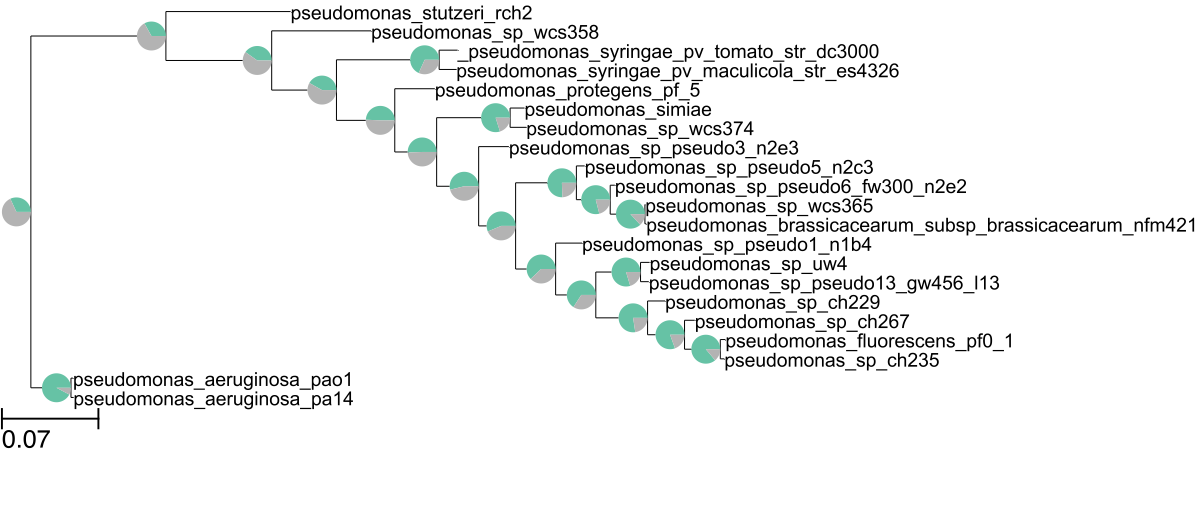

In [9]:
## in this example, the pie chart at each node represents the fraction of the genome shared by the entire clade
## green indicates conserved, gray indicates variable
## e.g. Pseudomonas CH229, CH267, Pf0-1, and CH235 share ~75% of their genomes
tree.render('%%inline',w=1200)